In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

print("Shape:", data.shape)
print(data.head())

Shape: (506, 14)
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
X = data.drop(columns=["medv"])   # medv = median house price
y = data["medv"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

🔹 Linear Regression

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

🔹 Ridge Regression

In [7]:
ridge = Ridge(alpha=1.0)  # alpha = regularization strength
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

🔹 Lasso Regression

In [8]:
lasso = Lasso(alpha=0.1)  # smaller alpha = less regularization
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

🔹 Evaluation Metrics

In [9]:
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name}: RMSE={rmse:.2f}, MAE={mae:.2f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_ridge, "Ridge Regression")
evaluate(y_test, y_pred_lasso, "Lasso Regression")

Linear Regression: RMSE=4.93, MAE=3.19
Ridge Regression: RMSE=4.93, MAE=3.19
Lasso Regression: RMSE=5.07, MAE=3.24


🔹 Compare Models

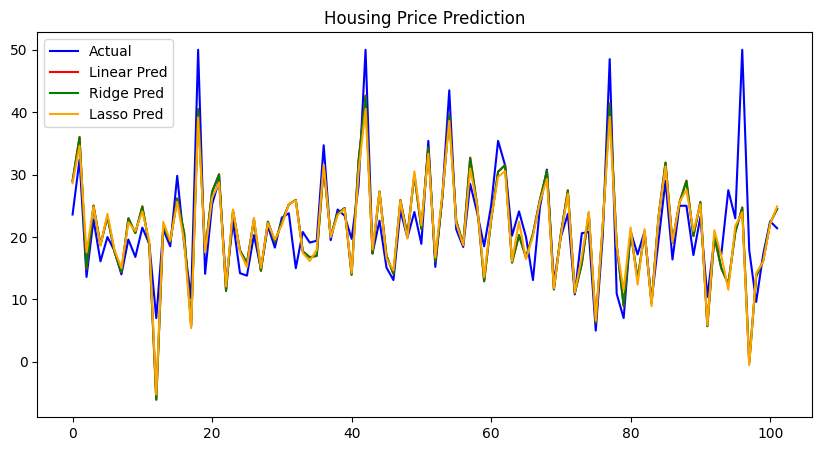

In [10]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", color="blue")
plt.plot(y_pred_lr, label="Linear Pred", color="red")
plt.plot(y_pred_ridge, label="Ridge Pred", color="green")
plt.plot(y_pred_lasso, label="Lasso Pred", color="orange")
plt.legend()
plt.title("Housing Price Prediction")
plt.show()

In [11]:
models = {
    "Linear Regression": lin_reg,
    "Ridge Regression": ridge,
    "Lasso Regression": lasso
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Cross-Validation Results (using RMSE):\n")

cv_scores = {}

for name, model in models.items():
    # cross_val_score by default returns negative MSE for scoring="neg_mean_squared_error"
    neg_mse_scores = cross_val_score(model, X_train_scaled, y_train,
                                     scoring="neg_mean_squared_error",
                                     cv=kf)
    rmse_scores = np.sqrt(-neg_mse_scores)
    cv_scores[name] = rmse_scores
    
    print(f"{name}:")
    print(f"  Mean RMSE = {rmse_scores.mean():.2f}")
    print(f"  Std Dev   = {rmse_scores.std():.2f}")
    print("-" * 40)

Cross-Validation Results (using RMSE):

Linear Regression:
  Mean RMSE = 4.87
  Std Dev   = 0.80
----------------------------------------


Ridge Regression:
  Mean RMSE = 4.86
  Std Dev   = 0.81
----------------------------------------
Lasso Regression:
  Mean RMSE = 4.91
  Std Dev   = 0.90
----------------------------------------


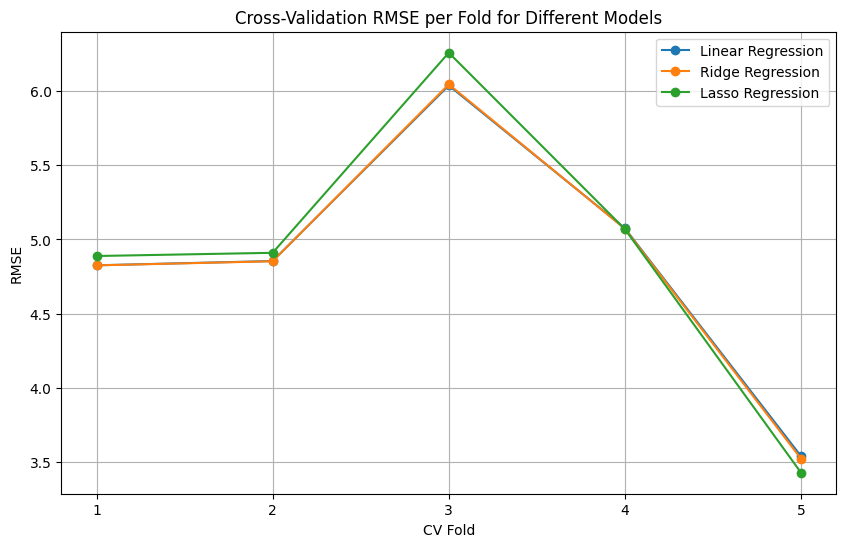

In [12]:
plt.figure(figsize=(10,6))
for name, scores in cv_scores.items():
    plt.plot(range(1, len(scores)+1), scores, marker='o', label=name)

plt.xlabel("CV Fold")
plt.ylabel("RMSE")
plt.title("Cross-Validation RMSE per Fold for Different Models")
plt.xticks(range(1, kf.get_n_splits()+1))
plt.legend()
plt.grid(True)
plt.show()